In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install statsbombpy


Note: you may need to restart the kernel to use updated packages.


In [3]:
from statsbombpy import sb

In [4]:
competitions = sb.competitions()
competitions.head()

/Users/jotayamaguchi/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-12-12T07:43:33.436182,None,None,2023-12-12T07:43:33.436182
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [5]:
w_comps = competitions[competitions['competition_gender'] == 'female']
w_comps.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
22,37,90,England,FA Women's Super League,female,False,False,2020/2021,2023-02-25T14:52:09.326729,2021-06-13T16:17:31.694,None,2023-02-25T14:52:09.326729
23,37,42,England,FA Women's Super League,female,False,False,2019/2020,2023-07-25T01:08:03.214566,2021-06-13T16:17:31.694,None,2023-07-25T01:08:03.214566
24,37,4,England,FA Women's Super League,female,False,False,2018/2019,2023-07-24T19:50:20.881595,2021-06-13T16:17:31.694,None,2023-07-24T19:50:20.881595
60,49,3,United States of America,NWSL,female,False,False,2018,2023-07-24T13:01:22.094587,2021-06-13T16:17:31.694,None,2023-07-24T13:01:22.094587
67,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-10-24T03:36:54.066267,2023-10-24T03:37:29.085948,2023-10-24T03:37:29.085948,2023-10-24T03:36:54.066267


In [6]:
nwsl = sb.matches(competition_id=49, season_id=3)
nwsl.shape

/Users/jotayamaguchi/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


(36, 22)

In [7]:
nwsl.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,7476,2018-07-08,01:00:00.000,United States of America - NWSL,2018,NJ/NY Gotham FC,Chicago Red Stars,1,3,available,...,2021-06-13T16:17:31.694,13,Regular Season,Yurcak Field,Jasmine Peralta,Denise Reddy,Rory Dames,1.0.2,None,None
1,7482,2018-07-12,01:00:00.000,United States of America - NWSL,2018,North Carolina Courage,Washington Spirit,2,0,available,...,2021-06-13T16:17:31.694,15,Regular Season,WakeMed Soccer Park,Daniel Gutierrez,Paul Riley,James Gabarra,1.0.2,None,None
2,7494,2018-08-06,02:30:00.000,United States of America - NWSL,2018,Houston Dash,Utah Royals,1,2,available,...,2021-06-13T16:17:31.694,17,Regular Season,Shell Energy Stadium,Rosendo Mendoza,Vera Pauw,Laura Harvey,1.0.2,None,None
3,7486,2018-07-16,05:00:00.000,United States of America - NWSL,2018,Portland Thorns,Houston Dash,3,1,available,...,2021-06-13T16:17:31.694,16,Regular Season,Providence Park,Eric Tattersall,Mark Richard David Parsons,Vera Pauw,1.0.2,None,None
4,7497,2018-08-11,02:00:00.000,United States of America - NWSL,2018,Chicago Red Stars,North Carolina Courage,1,1,available,...,2021-06-13T16:17:31.694,17,Regular Season,SeatGeek Stadium,Matthew Franz,Rory Dames,Paul Riley,1.0.2,None,None


In [8]:
match_ids = nwsl['match_id'].tolist()

In [9]:
events = sb.competition_events(
    country = 'United States of America',
    division = 'NWSL',
    season = '2018',
    gender = 'female'
    )
columns = events.columns.tolist()

/Users/jotayamaguchi/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/jotayamaguchi/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/jotayamaguchi/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/jotayamaguchi/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/jotayamaguchi/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/jotayamaguchi/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not

In [10]:
columns

['50_50',
 'bad_behaviour_card',
 'ball_receipt_outcome',
 'ball_recovery_offensive',
 'ball_recovery_recovery_failure',
 'block_deflection',
 'block_offensive',
 'block_save_block',
 'carry_end_location',
 'clearance_aerial_won',
 'counterpress',
 'dribble_nutmeg',
 'dribble_outcome',
 'dribble_overrun',
 'duel_outcome',
 'duel_type',
 'duration',
 'foul_committed_advantage',
 'foul_committed_card',
 'foul_committed_offensive',
 'foul_committed_penalty',
 'foul_committed_type',
 'foul_won_advantage',
 'foul_won_defensive',
 'foul_won_penalty',
 'goalkeeper_body_part',
 'goalkeeper_end_location',
 'goalkeeper_outcome',
 'goalkeeper_position',
 'goalkeeper_technique',
 'goalkeeper_type',
 'id',
 'index',
 'injury_stoppage_in_chain',
 'interception_outcome',
 'location',
 'match_id',
 'minute',
 'miscontrol_aerial_won',
 'pass_aerial_won',
 'pass_angle',
 'pass_assisted_shot_id',
 'pass_backheel',
 'pass_body_part',
 'pass_cross',
 'pass_cut_back',
 'pass_deflected',
 'pass_end_location'

In [11]:
teams = events['team'].unique().tolist()
team_ids = events['team_id'].unique().tolist()

In [12]:
events = events.sort_values(by='team')

In [13]:
nc_courage = events[events['team']=='North Carolina Courage']
n_games = len(nc_courage['match_id'].unique())
print(n_games)

13


# Player Involvement

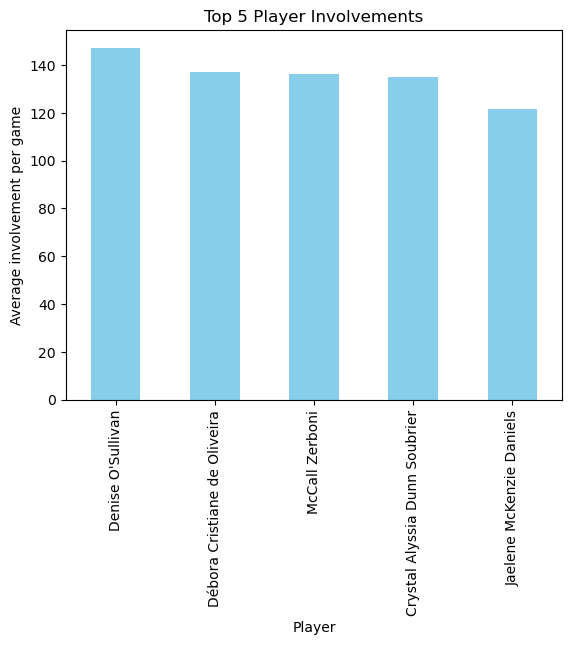

In [14]:
import matplotlib.pyplot as plt
player_involvement = nc_courage['player'].value_counts()

player_involvement_average = player_involvement / n_games

top_5 = player_involvement_average.head(5)


top_5.plot(kind='bar', color='skyblue')
plt.title('Top 5 Player Involvements')
plt.xlabel('Player')
plt.ylabel('Average involvement per game')
plt.show()




# Denise O'Sullivan Analysis

In [15]:
sullivan = nc_courage[nc_courage['player']== "Denise O'Sullivan"]
sullivan.shape

(1914, 92)

In [16]:
remove_columns = ['tactics', 'team', 'team_id', 'match_id','substitution_outcome',
 'substitution_replacement']

sullivan = sullivan.drop(columns=remove_columns)

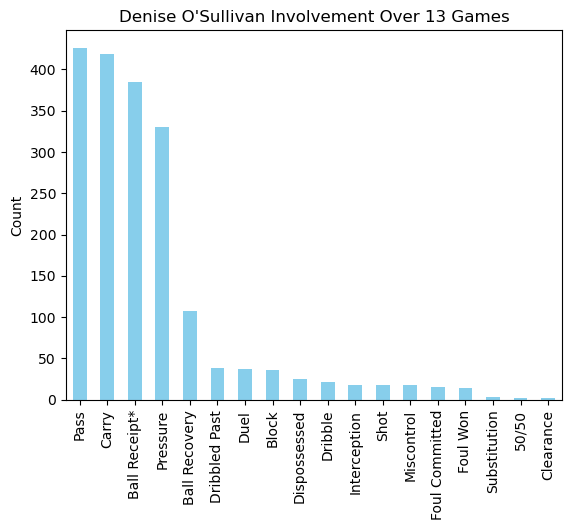

In [17]:
types = sullivan['type'].value_counts()
types.plot(kind='bar', color='skyblue')
plt.title("Denise O'Sullivan Involvement Over 13 Games")
plt.xlabel('')
plt.ylabel('Count')
plt.show()

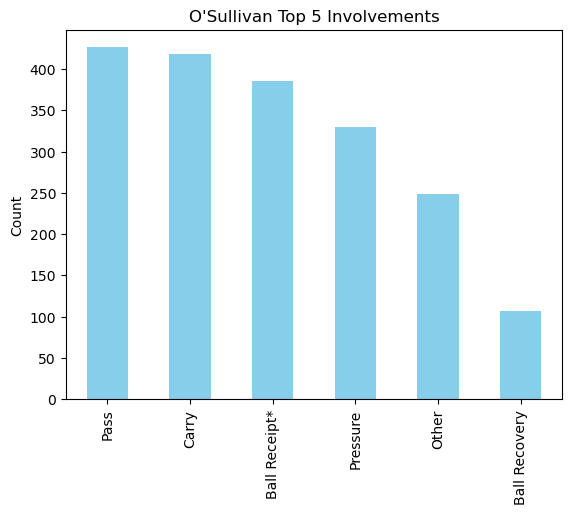

In [18]:

# Assuming 'sullivan' is your DataFrame
top_types = sullivan['type'].value_counts().nlargest(5)  # Get the top 5 types and their counts
other_types = sullivan['type'].value_counts().nsmallest(len(sullivan['type'].unique()) - 5)  # Get the counts of types outside the top 5

# Replace types outside the top 5 with 'Other'
sullivan['type'] = sullivan['type'].apply(lambda x: x if x in top_types else 'Other')

# Recalculate counts after replacing with 'Other'
types = sullivan['type'].value_counts()

# Create a bar plot using the count values
types.plot(kind='bar', color='skyblue')

# Set the title and labels for the plot
plt.title("O'Sullivan Top 5 Involvements")
plt.xlabel('')
plt.ylabel('Count')

# Display the plot
plt.show()


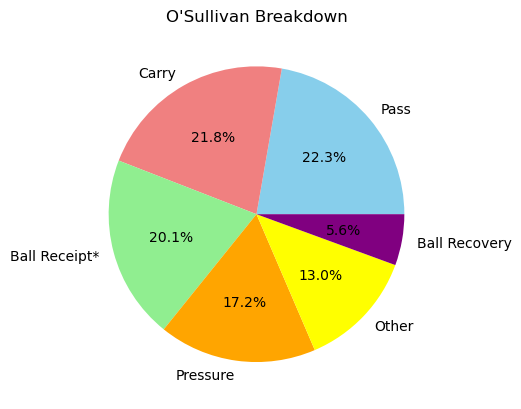

In [19]:
# Plotting the pie chart
types.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'yellow', 'purple'])
plt.title("O'Sullivan Breakdown")
plt.ylabel('')  # Removes the y-axis label for better presentation
plt.show()


In [20]:
passes = sullivan[sullivan['type'] == 'Pass']
pass_outcome = passes['pass_outcome'].value_counts()
pass_outcome = pass_outcome / len(passes)
pass_outcome

pass_outcome
Incomplete      0.192488
Out             0.023474
Pass Offside    0.007042
Name: count, dtype: float64

In [21]:
pass_angles = passes['pass_angle']

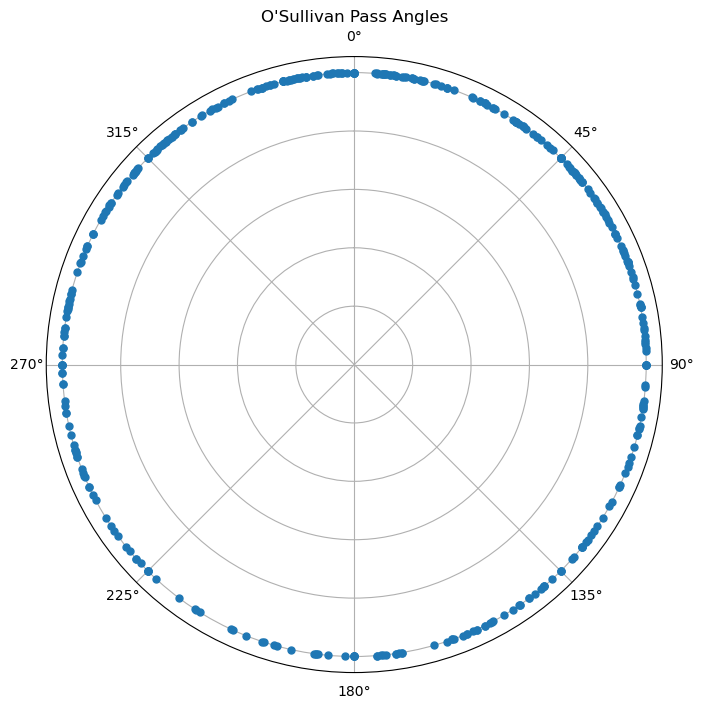

In [22]:
# Plotting the polar chart
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotting the angles
ax.plot(pass_angles, np.ones_like(pass_angles), marker='o', linestyle='', markersize=5)

# Setting the direction of 0 degrees to be at the top of the plot
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

# Removing y-axis labels for better presentation
ax.set_yticklabels([])

plt.title("O'Sullivan Pass Angles")
plt.show()

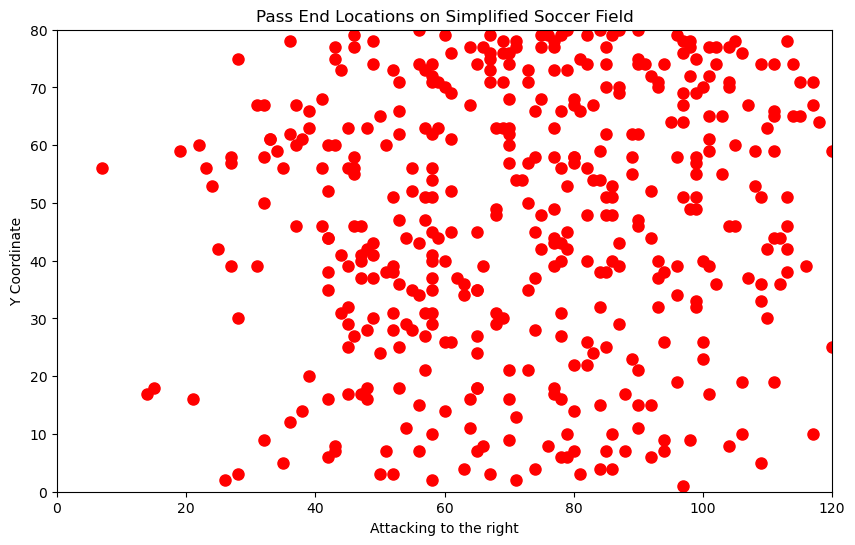

In [23]:
pass_location = passes['pass_end_location']
import matplotlib.patches as patches



# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Plot the pass locations on the soccer field
for x, y in pass_location:
    ax.plot(x, y, marker='o', markersize=8, color='red')

# Set the axis limits
ax.set_xlim(0, 120)
ax.set_ylim(0, 80)

# Add labels or other annotations if needed
plt.title('Pass End Locations on Simplified Soccer Field')
plt.xlabel('Attacking to the right')
plt.ylabel('Y Coordinate')

# Show the plot
plt.show()


In [24]:
carry = sullivan[sullivan['type']== 'Carry']

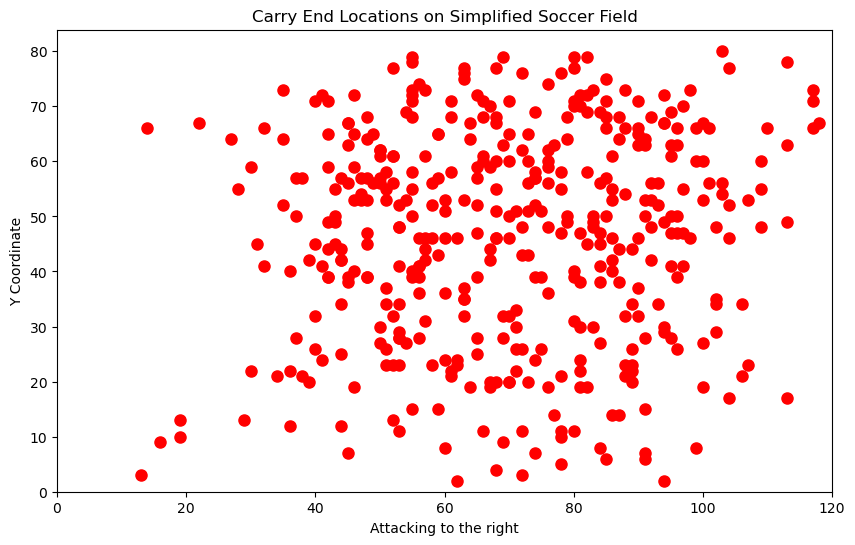

In [25]:
carry_location = carry['carry_end_location']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))



# Plot the pass locations on the soccer field
for x, y in carry_location:
    ax.plot(x, y, marker='o', markersize=8, color='red')

# Set the axis limits
ax.set_xlim(0, 120)
ax.set_ylim(0, )

# Add labels or other annotations if needed
plt.title('Carry End Locations on Simplified Soccer Field')
plt.xlabel('Attacking to the right')
plt.ylabel('Y Coordinate')

# Show the plot
plt.show()

TypeError: cannot unpack non-iterable float object

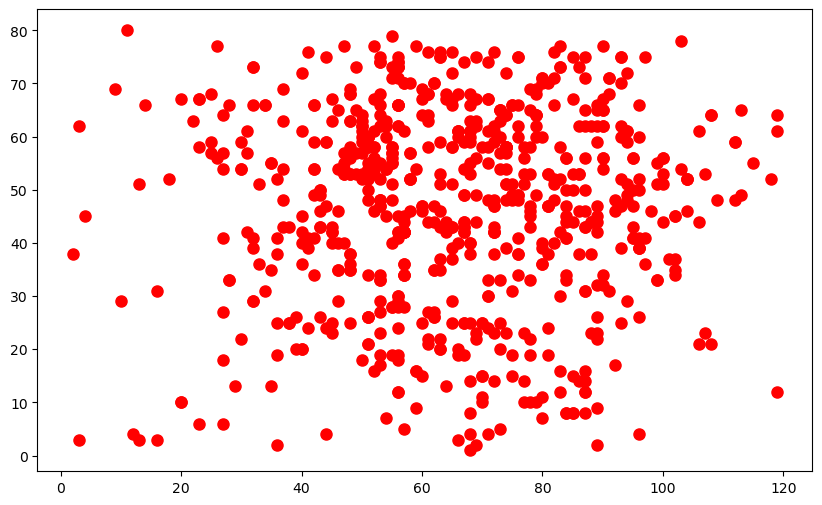

In [26]:
location = sullivan['location']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Plot the pass locations on the soccer field
for x, y in location:
    ax.plot(x, y, marker='o', markersize=8, color='red')

# Set the axis limits
ax.set_xlim(0, 120)
ax.set_ylim(0, 80)

# Add labels or other annotations if needed
plt.title('Sullivan Activity on Simplified Soccer Field')
plt.xlabel('Attacking to the right')
plt.ylabel('Y Coordinate')

# Show the plot
plt.show()

In [ ]:
recieved = nc_courage[nc_courage['pass_recipient']== "Denise O'Sullivan" ]

In [ ]:
passing_player = recieved['player'].value_counts()
top_5_passers = passing_player.head(5)
top_5_passers.plot(kind='bar', color='skyblue')
plt.title("Players That Pass to O'Sullivan")
plt.xlabel('')
plt.ylabel('Number of Passes')
plt.show()

In [ ]:
#mathius position
mathius_position = nc_courage[nc_courage['player'] =='Merritt Mathias']['position']
mathius_position

In [ ]:
pass_location = recieved['location']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Plot the pass locations on the soccer field
for x, y in pass_location:
    ax.plot(x, y, marker='o', markersize=8, color='red')

# Set the axis limits
ax.set_xlim(0, 120)
ax.set_ylim(0, 80)

# Add labels or other annotations if needed
plt.title("Where O'Sullivan receives the ball")
plt.xlabel('Attacking to the right')
plt.ylabel('')

# Show the plot
plt.show()

In [ ]:
player_xg= nc_courage.groupby('player')['shot_statsbomb_xg'].sum().sort_values(ascending=False)
player_xg_average = player_xg/n_games
total_xg = sum(player_xg)
average_xg_pergame = total_xg / n_games

In [ ]:
top_5_xg = player_xg_average.head(5)
print(top_5_xg)
top_5_xg.plot(kind='bar', color='skyblue')
plt.title('Top 5 Average xG per Game')
plt.xlabel('')
plt.ylabel('xG')
plt.show()

# Team tendancies

In [ ]:
# Create a boolean mask based on the conditions
mask = (nwsl['home_team'] == 'North Carolina Courage') | (nwsl['away_team'] == 'North Carolina Courage')


match_ids = list(nwsl.loc[mask, 'match_id'])

# Print or use the result as needed
print(match_ids)



In [ ]:
nc_games = pd.DataFrame()
for i in match_ids:
    nc_games = pd.concat([nc_games, sb.events(match_id=i)], ignore_index = True)
nc_games

In [ ]:
nc_games['type'].value_counts

In [ ]:
nc_games['shot_outcome'].unique()

In [ ]:
conceeded = nc_games[(nc_games['shot_outcome'] == 'Goal') & (nc_games['team']!= 'North Carolina Courage')]
scored = nc_games[(nc_games['shot_outcome'] == 'Goal') & (nc_games['team']== 'North Carolina Courage')]
scored

In [ ]:
opponents = nc_games[nc_games['team'] != 'North Carolina Courage']

In [ ]:
total_xG = nc_courage['shot_statsbomb_xg'].sum()
average_xG = total_xG /n_games
total_G = len(scored)
average_G = total_G /n_games

In [ ]:
total_oppo_xG = opponents['shot_statsbomb_xg'].sum()
average_oppo_xG = total_oppo_xG / n_games
total_oppo_G = len(conceeded)
average_oppo_G = total_oppo_G /n_games

In [ ]:
import seaborn as sns

data = {'Total xG': total_xG,  'Total Goals': total_G,'Average xG per Game': average_xG, 'Average Goals per Game': average_G}
keys = list(data.keys())
values = list(data.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=values, y=keys, palette='viridis')

# Add labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('NC Courage xG and Goal Comparison')

# Show the plot
plt.show()

In [ ]:
data = {'Total xG': total_oppo_xG,  'Total Goals': total_oppo_G,'Average xG per Game': average_oppo_xG, 'Average Goals per Game': average_oppo_G}
keys = list(data.keys())
values = list(data.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=values, y=keys, palette='viridis')

# Add labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Opponent xG and Goals Comparison')

# Show the plot
plt.show()

In [ ]:
conceeded_loc = conceeded['location']
scored_loc = scored['location']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Plot the pass locations on the soccer field
for x, y in scored_loc:
    ax.plot(x, y, marker='o', markersize=8, color='blue')

# Set the axis limits
ax.set_xlim(0, 120)
ax.set_ylim(0, 80)

# Add labels or other annotations if needed
plt.title('NC Goal Location')
plt.xlabel('Attacking to the right')
plt.ylabel('')

# Show the plot
plt.show()

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Plot the pass locations on the soccer field
for x, y in conceeded_loc:
    ax.plot(x, y, marker='o', markersize=8, color='red')

# Set the axis limits
ax.set_xlim(0, 120)
ax.set_ylim(0, 80)

# Add labels or other annotations if needed
plt.title('NC Conceeded Goal Location')
plt.xlabel('Attacking to the right')
plt.ylabel('')

# Show the plot
plt.show()

In [ ]:
nc_assists = nc_courage[nc_courage['pass_goal_assist']== True]
nc_assist_loc = nc_assists['location']
oppo_assists = nc_games[(nc_games['pass_goal_assist']==True) & (nc_games['team']!= 'North Carolina Courage')]
oppo_assist_loc = oppo_assists['location']

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Plot the pass locations on the soccer field
for x, y in nc_assist_loc:
    ax.plot(x, y, marker='o', markersize=8, color='blue')

# Set the axis limits
ax.set_xlim(0, 120)
ax.set_ylim(0, 80)

# Add labels or other annotations if needed
plt.title('NC Assist Locations')
plt.xlabel('Attacking to the right')
plt.ylabel('')

# Show the plot
plt.show()

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Plot the pass locations on the soccer field
for x, y in oppo_assist_loc:
    ax.plot(x, y, marker='o', markersize=8, color='blue')

# Set the axis limits
ax.set_xlim(0, 120)
ax.set_ylim(0, 80)

# Add labels or other annotations if needed
plt.title('Opposition Assist Locations')
plt.xlabel('Attacking to the right')
plt.ylabel('')

# Show the plot
plt.show()